In [1]:
from sklearn.cluster import KMeans

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.DataFrame(columns=('x' , 'y'))
df.loc[0] = [7,1]
df.loc[1] = [2,1]
df.loc[2] = [4,2]
df.loc[3] = [9,4]
df.loc[4] = [10,5]
df.loc[5] = [10,6]
df.loc[6] = [11,5]
df.loc[7] = [11,6]
df.loc[8] = [15,3]
df.loc[9] = [15,2]
df.loc[10] = [16,6]
df.loc[11] = [16,1]

In [4]:
df

,x,y
0,7,1
1,2,1
2,4,2
3,9,4
4,10,5
5,10,6
6,11,5
7,11,6
8,15,3
9,15,2


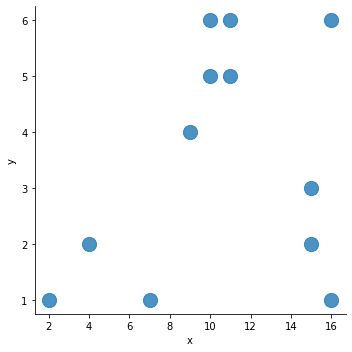

In [6]:
sns.lmplot('x' , 'y' , data=df , fit_reg=False , scatter_kws={'s' : 200}) # 데이터 포인트 출력

In [7]:
data_points = df.values
data_points

array([[7, 1],
       [2, 1],
       [4, 2],
       [9, 4],
       [10, 5],
       [10, 6],
       [11, 5],
       [11, 6],
       [15, 3],
       [15, 2],
       [16, 6],
       [16, 1]], dtype=object)

In [10]:
kmeans = KMeans(n_clusters = 3).fit(data_points) # 3개로 그룹화해서 학습
kmeans.labels_ # 그룹에 대한 라벨 출력

array([1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2], dtype=int32)

In [11]:
df['clu_id'] = kmeans.labels_
df

,x,y,clu_id
0,7,1,1
1,2,1,1
2,4,2,1
3,9,4,0
4,10,5,0
5,10,6,0
6,11,5,0
7,11,6,0
8,15,3,2
9,15,2,2


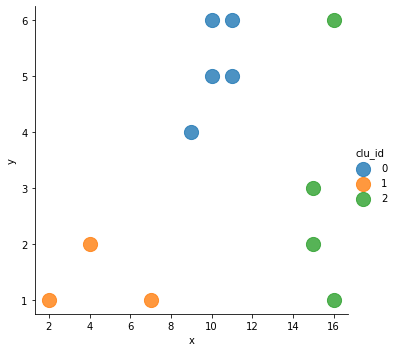

In [13]:
#visualization data point
sns.lmplot('x' , 'y' , data=df , fit_reg=False , scatter_kws={'s' : 200}, # s : 도트 사이즈
                  hue='clu_id') #라벨에 따라 분류 출력


In [14]:
# 분류용 가상 데이터 생성
# make_blobs() : 등방성 가우시안 정규 분포 , 방향이 같은 성질
#n_samples : 표본수
#n_features : 독립변수의 수
#centers : 클러스터의 수

In [15]:
from sklearn.datasets import make_blobs

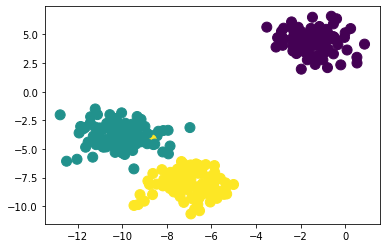

In [18]:
X , y = make_blobs(n_samples=300 , n_features=2 , centers=3 , random_state=1)
plt.scatter(X[: , 0] , X[: , 1] , marker='o' , c=y , s=100)

In [19]:
feature , label = make_blobs(random_state=1)

In [22]:
clu_mean = KMeans(n_clusters = 3)
clu_mean.fit(feature)

KMeans(n_clusters=3)

In [24]:
clu_mean.labels_

array([0, 2, 2, 2, 1, 1, 1, 2, 0, 0, 2, 2, 1, 0, 1, 1, 1, 0, 2, 2, 1, 2,
       1, 0, 2, 1, 1, 0, 0, 1, 0, 0, 1, 0, 2, 1, 2, 2, 2, 1, 1, 2, 0, 2,
       2, 1, 0, 0, 0, 0, 2, 1, 1, 1, 0, 1, 2, 2, 0, 0, 2, 1, 1, 2, 2, 1,
       0, 1, 0, 2, 2, 2, 1, 0, 0, 2, 1, 1, 0, 2, 0, 2, 2, 1, 0, 0, 0, 0,
       2, 0, 1, 0, 0, 2, 2, 1, 1, 0, 1, 0], dtype=int32)

In [26]:
clu_mean.predict(feature)

array([0, 2, 2, 2, 1, 1, 1, 2, 0, 0, 2, 2, 1, 0, 1, 1, 1, 0, 2, 2, 1, 2,
       1, 0, 2, 1, 1, 0, 0, 1, 0, 0, 1, 0, 2, 1, 2, 2, 2, 1, 1, 2, 0, 2,
       2, 1, 0, 0, 0, 0, 2, 1, 1, 1, 0, 1, 2, 2, 0, 0, 2, 1, 1, 2, 2, 1,
       0, 1, 0, 2, 2, 2, 1, 0, 0, 2, 1, 1, 0, 2, 0, 2, 2, 1, 0, 0, 0, 0,
       2, 0, 1, 0, 0, 2, 2, 1, 1, 0, 1, 0], dtype=int32)

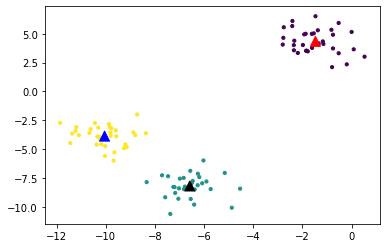

In [31]:
plt.scatter(feature[ : , 0] , feature[ : , 1] , 
               c = clu_mean.labels_ , 
               marker = 'o' ,
               s = 10)
plt.scatter(clu_mean.cluster_centers_[:,0] , clu_mean.cluster_centers_[:,1] , c = ['r', 'k', 'b']  , marker = '^' , s = 100)
plt.show()

In [28]:
clu_mean.cluster_centers_

array([[ -1.4710815 ,   4.33721882],
       [ -6.58196786,  -8.17239339],
       [-10.04935243,  -3.85954095]])

### K-Means Clustering

In [32]:
from sklearn.datasets import load_iris

In [45]:
iris = load_iris()

In [50]:
# 데이터 핸들링 위한 데이터프레임으로 변환
iris_df = pd.DataFrame(data=iris.data , columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### KMeans 객체 생성, 군집화 수행

In [54]:
iris_means = KMeans(n_clusters = 3, random_state=0 , init='k-means++' , max_iter=300)
iris_means.fit(iris_df)

KMeans(n_clusters=3, random_state=0)

In [55]:
print(iris_means.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [56]:
print(iris_means.predict(iris_df))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [57]:
# 포인트 별 할당된 그룹을 열로 추가해보자
iris_df['clu_id'] = iris_means.labels_
iris_df['target'] = iris.target # 타겟도 추가

In [58]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),clu_id,target
0,5.1,3.5,1.4,0.2,1,0
1,4.9,3.0,1.4,0.2,1,0
2,4.7,3.2,1.3,0.2,1,0
3,4.6,3.1,1.5,0.2,1,0
4,5.0,3.6,1.4,0.2,1,0


In [ ]:
# 그룹을(target , clu_id) 통한 sepal_length 빈도를 확인해보자

In [67]:
iris_df.groupby([ 'target', 'clu_id'])['sepal length (cm)'].count()

target  clu_id
0       1         50
1       0          2
        2         48
2       0         36
        2         14
Name: sepal length (cm), dtype: int64

In [68]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [70]:
# 구현 시각화 불가, 피처가 2개가 아닌 4개이기 때문

In [107]:
# 2차원 평면에 데이터 포인트 별로 군집화된 결과를 시각화
# 차원 축소
# 주성분 분석

from sklearn.decomposition import PCA

iris_pca = PCA(n_components=2)
iris_pca_transform = iris_pca.fit_transform(iris.data)
iris_pca_transform 

iris_df['pca_x'] = iris_pca_transform[ : , 0]
iris_df['pca_y'] = iris_pca_transform[ : , 1]
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),clu_id,target,pca_x,pca_y
0,5.1,3.5,1.4,0.2,1,0,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,1,0,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,1,0,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,1,0,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,1,0,-2.728717,0.326755


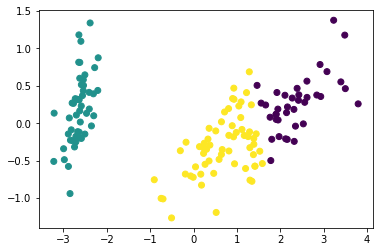

In [108]:
plt.scatter(x=iris_df['pca_x'] , y=iris_df['pca_y'], c=iris_df['clu_id'])
plt.show()

In [120]:
# 표준화 통한 차원 축소 및 시각화
from sklearn.preprocessing import StandardScaler
iris_scaler = StandardScaler().fit_transform(iris_df.iloc[ : , : 4])
iris_scaler_df = pd.DataFrame(iris_scaler)
iris_scaler_df.head()

,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [121]:
from sklearn.decomposition import PCA
iris_pca = PCA(n_components=2) #피처를 2개로 차원 축소
iris_pca_transform = iris_pca.fit_transform(iris_scaler_df)
iris_df['sts_pca_x'] = iris_pca_transform[: , 0]
iris_df['sts_pca_y'] = iris_pca_transform[: , 1]
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),clu_id,target,pca_x,pca_y,sts_pca_x,sts_pca_y
0,5.1,3.5,1.4,0.2,1,0,-2.684126,0.319397,-2.264703,0.480027
1,4.9,3.0,1.4,0.2,1,0,-2.714142,-0.177001,-2.080961,-0.674134
2,4.7,3.2,1.3,0.2,1,0,-2.888991,-0.144949,-2.364229,-0.341908
3,4.6,3.1,1.5,0.2,1,0,-2.745343,-0.318299,-2.299384,-0.597395
4,5.0,3.6,1.4,0.2,1,0,-2.728717,0.326755,-2.389842,0.646835


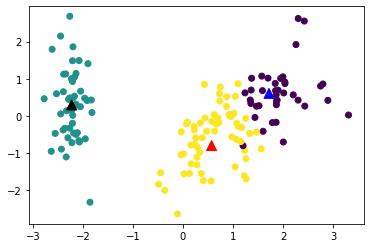

In [122]:
iris_clu_mean = KMeans(n_clusters=3)
iris_clu_mean.fit(iris_df.iloc[: , -2:])
plt.scatter(x=iris_df['sts_pca_x'], y=iris_df['sts_pca_y'], c=iris_df['clu_id'])
plt.scatter(iris_clu_mean.cluster_centers_[:,0],
                iris_clu_mean.cluster_centers_[:,1],
                c=['r', 'k', 'b'],marker='^',s=100)
plt.show()

#### PCA(차원 축소) : Princial Component Analysis
- 데이터의 피처를 압축(테이블 매트릭스의 차원을 낮추는 작업)
- 예) 온도, 습도, 강수량, 미세먼지, 풍속, 태풍 여부 .... 교통량, 유동인구
- 습도와 강수량은 양의 상관관계로 이 둘은 밀접한 연관성이 있음
- 이렇듯 연관성 있는 피처들을 하나로 합쳐주는 작업이 주성분 분석(PCA)

In [72]:
pca_iris_df = pd.DataFrame(data=iris.data , columns=iris.feature_names)
pca_iris_df['target'] = iris.target
pca_iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


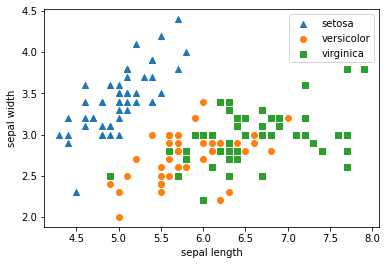

In [80]:
# 각 타겟별 데이터 분포 확인
markers = ['^', 'o', 's']
for i , marker in enumerate(markers) :
    #print(i , marker)
    x_data_point = pca_iris_df[pca_iris_df['target'] == i]['sepal length (cm)']
    y_data_point = pca_iris_df[pca_iris_df['target'] == i]['sepal width (cm)']
    # print(x_data_point , y_data_point)
    plt.scatter(x_data_point , y_data_point , marker=marker , label=iris.target_names[i])
    
plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [91]:
# 컬럼에 대한 데이터 표준화
from sklearn.preprocessing import StandardScaler
# 타겟을 제외한 피처만 추출해 표준화 작업 진행
# 주성분 분석 전 데이터 표준화

scaler = StandardScaler().fit_transform(pca_iris_df.iloc[ : , : 4])
pca_iris_scaler_df = pd.DataFrame(scaler)
pca_iris_scaler_df

,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [99]:
# 주성분 분석
from sklearn.decomposition import PCA
pca = PCA(n_components=2) #피처를 2개로 차원 축소
iris_pca = pca.fit(scaler).transform(scaler)
# iris_pca

iris_pca_df = pd.DataFrame(data=iris_pca, columns=['pca01', 'pca02'])
iris_pca_df ['target'] = iris.target
iris_pca_df.head()
iris_pca_df.describe()

,pca01,pca02,target
count,1.500000e+02,1.500000e+02,150.000000
mean,3.352874e-16,9.432270e-17,1.000000
std,1.714084e+00,9.592523e-01,0.819232
min,-2.774345e+00,-2.654073e+00,0.000000
25%,-2.102721e+00,-5.984875e-01,0.000000
50%,4.183111e-01,1.750202e-02,1.000000
75%,1.343027e+00,5.940342e-01,2.000000
max,3.310696e+00,2.686284e+00,2.000000


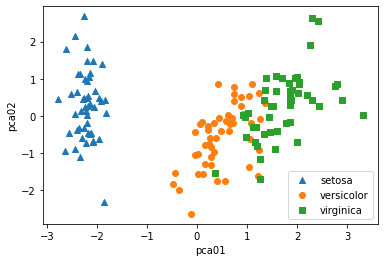

In [103]:
# 각 타겟별 데이터 분포 확인
markers = ['^', 'o', 's']
for i , marker in enumerate(markers) :
    #print(i , marker)
    x_data_point = iris_pca_df[iris_pca_df['target'] == i]['pca01']
    y_data_point = iris_pca_df[iris_pca_df['target'] == i]['pca02']
    # print(x_data_point , y_data_point)
    plt.scatter(x_data_point , y_data_point , marker=marker , label=iris.target_names[i])
    
plt.legend()
plt.xlabel('pca01')
plt.ylabel('pca02')
plt.show()

#표준화한 뒤 시각화하니 군집화가 더 잘 이뤄지는 걸 확인할 수 있다.